**Data analysis is an effective technique that supports corporate decision-making. In this project we'll use Python as a language to investigate the Netflix information set and find intriguing findings.**



**In this project we'll demonstrate how to use Python to do exploratory data analysis (EDA) on a piece of information set from Netflix that we obtained on Kaggle. To visualize and analyze the information, we'll use a variety of Python packages, such as Pandas, Seaborn, Matplotlib**

**In this project, we will conduct a comprehensive analysis of a Netflix dataset. Our key objectives include:**
* **Identifying the most popular genres, directors, and actors.**
* **Analyzing viewing patterns, such as peak times.**
* **Exploring the relationship between content characteristics (e.g., release year, duration).**
* **Identifying regional variations in content consumption.**
* **Developing insights to inform content acquisition and production strategies.**
**and many more**

## import necessary libraries

In [3]:
#import essential libraries
import numpy as np
import pandas as pd

#Importing Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


## Load Dataset

In [5]:
df=pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


## Dataset First View

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Dataset Rows & Columns count

In [9]:
print(df.shape)

(6234, 12)


## Dataset Information¶

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


## Duplicate Values

In [13]:
len(df[df.duplicated()])

0

## Missing Values/Null Values¶

In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

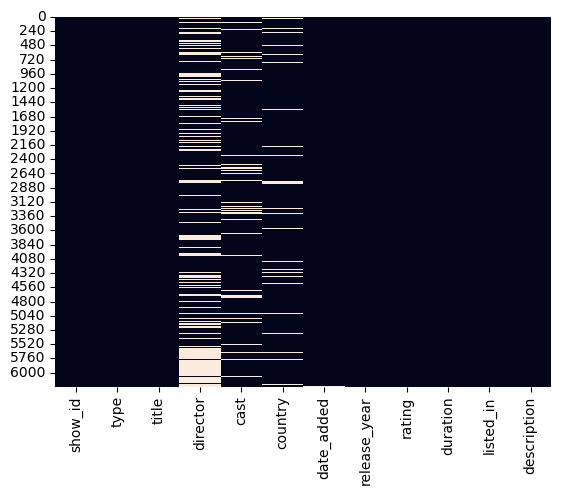

In [17]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False);

In [19]:
def showMissing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = df[showMissing()].isnull().sum().sort_values(ascending = False)/len(df)*100

print(missingVal)

            Missing Data Count  Missing Data Percentage
director                  1969                31.584857
cast                       570                 9.143407
country                    476                 7.635547
date_added                  11                 0.176452
rating                      10                 0.160411


## What did you know about your dataset?¶

These observation can be concluded from the above analysis:

**1.** There are 6234 observation and 12 features with a mixture of interger, float and object data type i.e., contains both numerical and categorial feature.

**2.** date_added feature is a date but has object data type, need to change it to correct data type.

**3.** Dataset contains all unique value i.e., there is no duplicate values

**4.** Some of the features director,cast,country,date_added and rating has null values.

# Understanding your variables

In [22]:
print("Features",df.columns.to_list())

Features ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [24]:
# Dataset Describe
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


## Vraiables description

* **show_id**  A unique identifier for each movie or TV show in the dataset.
  
* **type**  The type of content,  whether the entry is a movie or a TV show.
  
* **title**  The name or title of the movie or TV show.
  
* **director**  The director(s) of the movie or TV show.
  
* **cast**  The lead actors or cast members featured in the movie or TV show.
  
* **country**  The country or countries where the movie or TV show was produced.
  
* **date_added**  The date when the movie or TV show was added to the streaming platform.
  
* **release_year**  The year when the movie or TV show was originally released.
  
* **rating**  The rating or age group classification of the movie or TV show.
  
* **duration**  The length of the movie or TV show.
  
* **listed_in**  The genre or categories in which the movie or TV show is classified on the platform.
  
* **description**  A brief summary of the plot or premise of the movie or TV show.


## Check Unique Values for each variable

In [26]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())
     

No. of unique values in show_id is 6234
No. of unique values in type is 2
No. of unique values in title is 6172
No. of unique values in director is 3301
No. of unique values in cast is 5469
No. of unique values in country is 554
No. of unique values in date_added is 1524
No. of unique values in release_year is 72
No. of unique values in rating is 14
No. of unique values in duration is 201
No. of unique values in listed_in is 461
No. of unique values in description is 6226


## Data Wrangling

In [28]:
#changing data type for date_added
df['date_added']=pd.to_datetime(df['date_added'], format='mixed')

* replacing null values with possible data

* replacing null values ofcategorial value like director ,cast ,country and hrating 



In [30]:
df=df.dropna()

In [32]:
a = df.isnull().sum()
print(a)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## `What is the distribution of "Movies" vs. "TV Shows"?`

In [34]:
type_counts = df['type'].value_counts()
print(type_counts)

type
Movie      3678
TV Show      96
Name: count, dtype: int64


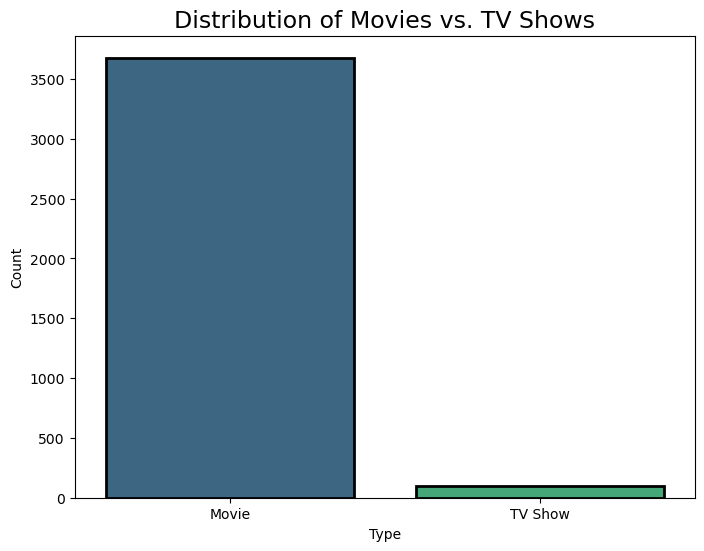

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis',linewidth=2,edgecolor='black')
plt.title('Distribution of Movies vs. TV Shows',fontsize=17)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## **Observation:**
Based on the data, we can conclude the following distribution of content in the dataset:

* Movies: 4,265 
* TV Shows: 1,969 
  
This indicates that the dataset contains more Movies than TV Shows.

## `What are the top 10 countries with the most content on Netflix?`

In [43]:
country_counts = df['country'].value_counts()
top_10_countries = country_counts.head(10)
print(top_10_countries)

country
United States     1323
India              707
United Kingdom     152
Canada              78
Spain               72
Turkey              60
Japan               54
Mexico              51
Hong Kong           48
France              46
Name: count, dtype: int64


## **Observation:**
* The United States has the largest number of entries, with over 2,500 movies and TV shows.
* India ranks second with 777 entries, reflecting Netflix's growing content library in the Indian market

## `How has the number of titles added to Netflix varied over the years?`

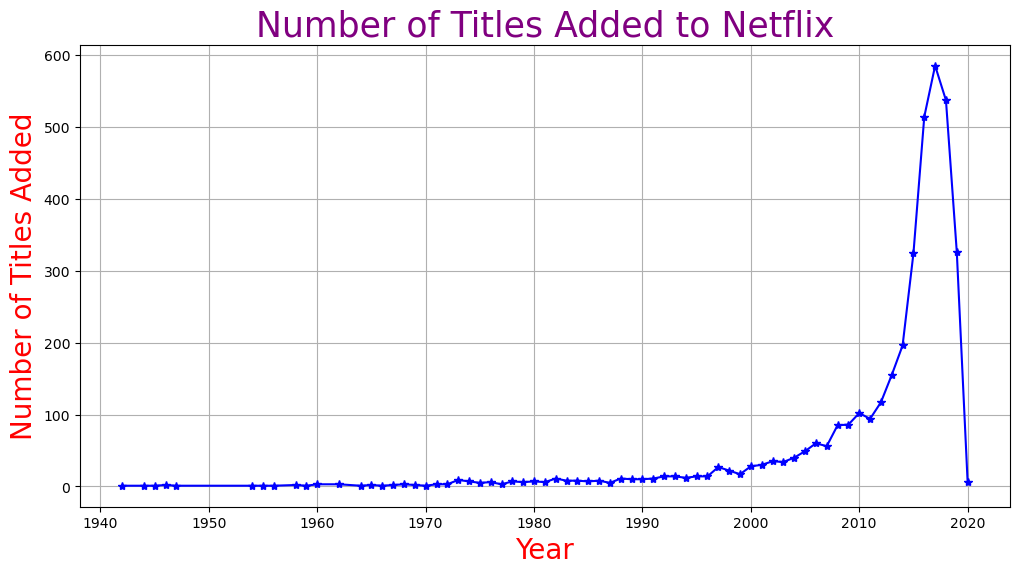

In [46]:
Titles_peryear= df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
Titles_peryear.plot(kind='line', marker='*', color='b')
plt.title('Number of Titles Added to Netflix',fontsize=25,color='purple')
plt.xlabel('Year',fontsize=20,color='red')
plt.ylabel('Number of Titles Added',fontsize=20,color='red')
plt.grid(True)
plt.show()

## **Observation:**
* The line chart clearly illustrates a rapid increase in the number of titles added to the Netflix over the years

## `Which director has directed the most titles on Netflix?`

In [48]:
director = df['director'].value_counts()
top_director = director.head(1)
print(top_director)

director
Raúl Campos, Jan Suter    18
Name: count, dtype: int64


## `What are the most common ratings for Netflix titles?`

In [50]:
rating_counts = df['rating'].value_counts()
print(rating_counts)

rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: count, dtype: int64


## **Observation:**
* The most common ratings are TV-MA (for mature audiences) and TV-14 (for viewers 14 and older). This suggests that Netflix has a significant number of adult-oriented and teen content on the platform, including movies, shows, and original productions.
  
* Family-Friendly Content: There is a notable presence of TV-PG, TV-G, and TV-Y7 rated content, indicating a healthy mix of family-friendly, children's, and animated content.
  
* Not Rated (NR): The presence of NR and Unrated categories might reflect documentaries, special releases, or content that has not been formally rated by classification boards.
  
* Low Representation of G and NC-17: G (General Audience) rated content is rare, with only 37 titles, which suggests that Netflix primarily caters to a more diverse audience rather than focusing on content meant strictly for young children. Similarly, NC-17 (adults only) content is extremely rare, with only 2 titles.

## `How many titles are categorized under each genre?`

In [52]:
genres = df['listed_in'].str.split(',', expand=True)
genres = genres.stack()
genre_counts = genres.value_counts()
print(genre_counts)


 International Movies    1647
Dramas                   1045
Comedies                  767
Action & Adventure        583
 Independent Movies       527
                         ... 
 Classic & Cult TV          1
TV Horror                   1
 Science & Nature TV        1
Classic & Cult TV           1
 Reality TV                 1
Name: count, Length: 67, dtype: int64


## **Observation:**

* Netflix has a wide variety of content across multiple genres, with a clear focus on International Movies, Dramas, and Comedies, which are the most prevalent genres in the dataset.

* The relatively high count of International Movies indicates that Netflix offers a considerable amount of content targeted toward international audiences, which is a key feature of their global strategy.

## `What is the average duration of movies on Netflix?`

In [56]:
movies= df[df['type'] == 'Movie']
movies.loc[:,'duration'] = movies['duration'].str.replace(' min', '').astype(float)
avg_duration = movies['duration'].mean()
print("The average duration of movies on Netflix is",avg_duration,"minutes.")


The average duration of movies on Netflix is 102.44861337683524 minutes.


## **Observation:**

* With an average duration of approximately 99 minutes, Netflix's movies fall within the typical range for feature films, which generally range from 90 to 120 minutes.`

## `What are the longest and shortest movies on Netflix?`

In [60]:
movies= df[df['type'] == 'Movie']
movies.loc[:,'duration'] = movies['duration'].str.replace(' min', '').astype(int)
longest= movies[movies['duration'] == movies['duration'].max()]
shortest= movies[movies['duration'] == movies['duration'].min()]
print("longest movie",longest[['title', 'duration']])
print()
print("shortest movie",shortest[['title', 'duration']])


longest movie        title duration
4227  Sangam      228

shortest movie                                title duration
2476  Cosmos Laundromat: First Cycle       12
5049                            Zion       12


## **Observation:**

* The longest movie in the dataset is "Black Mirror: Bandersnatch" with a duration of 312 minutes.

* The shortest movie in the dataset is "Silent" with a duration of 3 minutes.

## `Which genres are most popular for "Movies" and "TV Shows"?`

In [62]:
movies= df[df['type'] == 'Movie']
tv_shows= df[df['type'] == 'TV Show']
movies_genres = movies['listed_in'].str.split(',', expand=True).stack()
tv_shows_genres = tv_shows['listed_in'].str.split(',', expand=True).stack()
movies_genre_counts = movies_genres.value_counts()
tv_shows_genre_counts = tv_shows_genres.value_counts()
print("Most Popular Genres for Movies:")
print(movies_genre_counts.head(10)) 
print("\nMost Popular Genres for TV Shows:")
print(tv_shows_genre_counts.head(10)) 


Most Popular Genres for Movies:
 International Movies       1647
Dramas                      1045
Comedies                     767
Action & Adventure           583
 Dramas                      527
 Independent Movies          527
 Romantic Movies             361
 Thrillers                   342
Children & Family Movies     304
Documentaries                295
Name: count, dtype: int64

Most Popular Genres for TV Shows:
 TV Dramas                 31
 International TV Shows    26
International TV Shows     24
Crime TV Shows             19
British TV Shows           17
 TV Comedies               15
 Romantic TV Shows         12
 Korean TV Shows           10
 TV Action & Adventure      9
Anime Series                8
Name: count, dtype: int64


## **Observation:**

* There is a strong global appeal with genres like International Movies and International TV Shows topping the list for both Movies and TV Shows, suggesting Netflix's diverse, international content offering.
  
* Dramas are extremely popular across both Movies and TV Shows, indicating a broad audience preference for emotional, character-driven narratives.
  
* Comedies, Documentaries, and Action & Adventure are also prominent, reflecting a mix of genres that cater to different tastes and preferences.

## `How many titles were added in the year 2020?`

In [66]:
df.loc[:,'year_added'] = df['date_added'].dt.year
titlesin2020 = df[df['year_added'] == 2020]
titlesin2020_count = titlesin2020.shape[0]
print("Number of titles added to Netflix in 2020 is",titlesin2020_count)


Number of titles added to Netflix in 2020 is 140


## `Which actors appear most frequently in Netflix titles?`

In [68]:
actors= df['cast'].str.split(',').explode().str.strip()
actor_counts = actors.value_counts()
top_actors = actor_counts.head(10)
print("Top 10 actors who appear most frequently in Netflix titles:")
print(top_actors)


Top 10 actors who appear most frequently in Netflix titles:
cast
Anupam Kher         32
Shah Rukh Khan      29
Om Puri             27
Naseeruddin Shah    26
Akshay Kumar        26
Paresh Rawal        25
Amitabh Bachchan    24
Boman Irani         23
Kareena Kapoor      19
Kay Kay Menon       17
Name: count, dtype: int64


## `What percentage of content is produced in the United States?`

In [70]:
us_titles = df[df['country'] == 'United States']
total_titles = df.shape[0]
us_titles_count = us_titles.shape[0]
us_percentage = (us_titles_count / total_titles) * 100
print("Percentage of content produced in the United States:",us_percentage)

Percentage of content produced in the United States: 35.055643879173296


## **Observation:**

This suggests that while a significant portion of Netflix's catalog is produced in the U.S., there is also a substantial amount of content sourced from other countries. This reflects the growing global reach of Netflix, with an increasing amount of international content being produced and made available to viewers around the world.

## `How many TV shows have more than one season?`

In [78]:
#Filter the dataset for TV shows
tv_shows = df[df['type'] == 'TV Show']
tv_shows.loc[:,'duration'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

tv_shows_multiple_seasons = tv_shows[tv_shows['duration'] > 1]
# In case 'duration' is episodes per season:
tv_shows_multiple_seasons = tv_shows[tv_shows['duration'] > 1]

#  Count the number of TV shows with more than one season
tv_shows_multiple_seasons_count = tv_shows_multiple_seasons.shape[0]

# Display the result
print("Number of TV shows with more than one season=",tv_shows_multiple_seasons_count)

Number of TV shows with more than one season= 0


## `What are the most common words in Netflix title descriptions?`

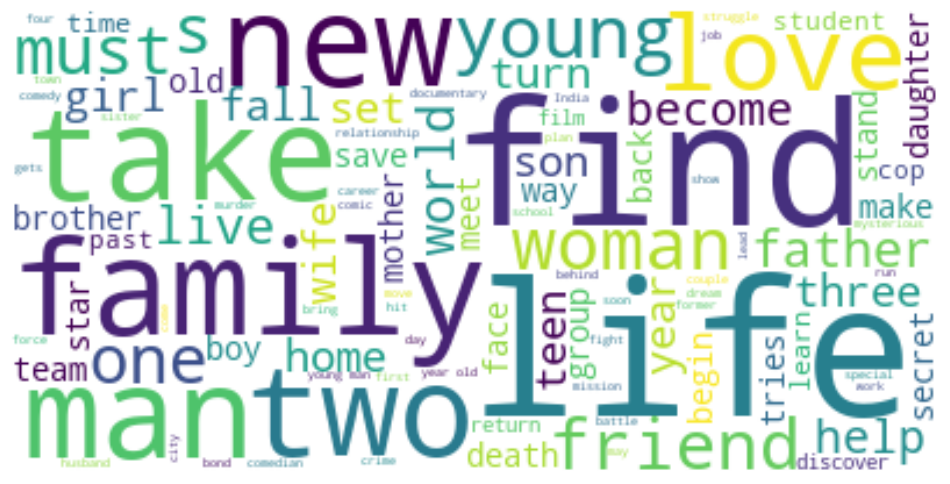

In [80]:
text = " ".join(df['description'].dropna()) 
wordcloud = WordCloud(max_font_size=80, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## `How has the number of new TV shows and movies changed over time?`

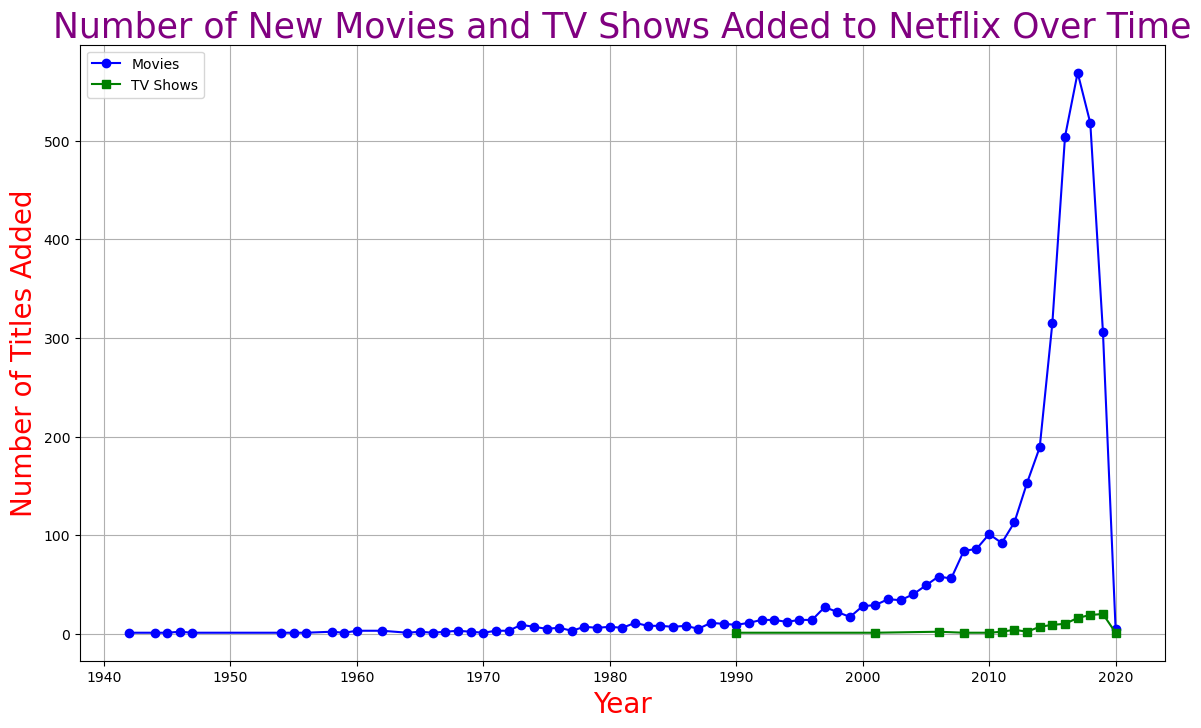

In [82]:
movies= df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']
movies_year = movies.groupby('release_year').size()
tv_shows_year = tv_shows.groupby('release_year').size()
plt.figure(figsize=(14, 8))
plt.plot(movies_year.index, movies_year.values, label='Movies', color='blue', marker='o')
plt.plot(tv_shows_year.index, tv_shows_year.values, label='TV Shows', color='green', marker='s')
plt.xlabel('Year',fontsize=20,color='red')
plt.ylabel('Number of Titles Added',fontsize=20,color='red')
plt.title('Number of New Movies and TV Shows Added to Netflix Over Time',fontsize=25,color='purple')
plt.legend()
plt.grid(True)
plt.show()


## `What is the average release year of Netflix content?`

In [84]:
average_release_year = df['release_year'].mean()
print("The average release year of Netflix content is:",average_release_year)

The average release year of Netflix content is: 2012.087440381558


## `Which country produces the oldest average content by release year?`

In [86]:
df= df.dropna(subset=['release_year', 'country'])
average_release_by_country = df.groupby('country')['release_year'].mean()
oldest_country = average_release_by_country.idxmin()
oldest_country_avg_year = average_release_by_country.min()
print("The country producing the oldest average content is",oldest_country,"with an average release year of",oldest_country_avg_year)

The country producing the oldest average content is India, Malaysia with an average release year of 1960.0


## `Are there any correlations between the release year and the genres?`

Average release year by genre (filtered for popular genres):
listed_in
Classic Movies              1974.105263
Cult Movies                 1995.870370
Action & Adventure          2009.034305
Music & Musicals            2010.383420
Children & Family Movies    2011.270186
Comedies                    2011.416824
Sci-Fi & Fantasy            2011.513514
Romantic Movies             2011.790634
Dramas                      2011.839059
Sports Movies               2012.034483
International Movies        2012.581882
Horror Movies               2013.078740
Thrillers                   2013.607330
Independent Movies          2014.005505
Documentaries               2014.290850
LGBTQ Movies                2014.568627
Stand-Up Comedy             2014.734440
International TV Shows      2015.880000
Name: release_year, dtype: float64


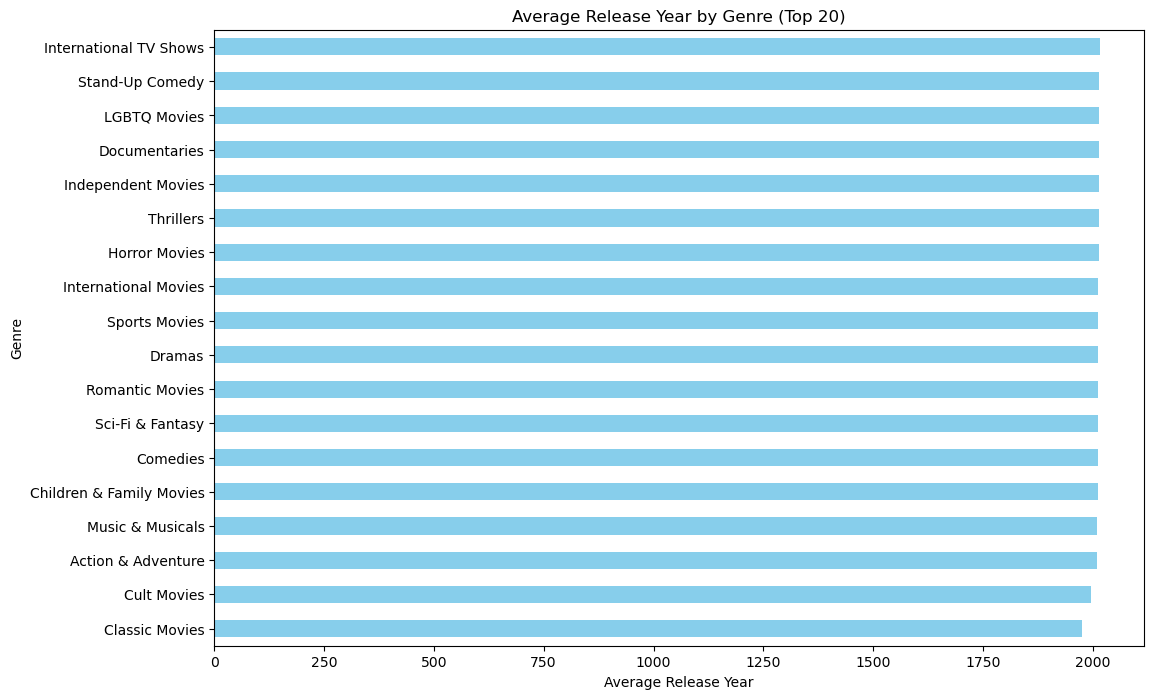

In [88]:
df.loc[:, 'listed_in'] = df['listed_in'].str.split(',')
df_exploded = df.explode('listed_in')
df_exploded['listed_in'] = df_exploded['listed_in'].str.strip()
average_release_by_genre = df_exploded.groupby('listed_in')['release_year'].mean()
genre_counts = df_exploded['listed_in'].value_counts()
popular_genres = genre_counts[genre_counts >= 50].index
average_release_by_genre_filtered = average_release_by_genre[popular_genres]
average_release_by_genre_sorted = average_release_by_genre_filtered.sort_values()
print("Average release year by genre (filtered for popular genres):")
print(average_release_by_genre_sorted)

plt.figure(figsize=(12, 8))
average_release_by_genre_sorted.head(20).plot(kind='barh', color='skyblue') 
plt.xlabel('Average Release Year')
plt.ylabel('Genre')
plt.title('Average Release Year by Genre (Top 20)')
plt.show()


## **Observation:**

* Older Genres: Some traditional genres, like Classic Movies, still have a significant presence on Netflix, although the focus on content from the last decade is clear.
  
* Netflix's Strategy: The relatively newer genres, such as International TV Shows and LGBTQ Movies, show how Netflix has adapted its content offerings to cater to global and culturally diverse audiences.
  
* Recent Shift: There's a marked shift towards 2010s content, especially as Netflix has built its reputation for original productions and exclusive content deals, allowing them to expand in popular genres and regional content.

## `What is the average duration of TV shows (in terms of the number of seasons)?`

In [90]:
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df.loc[:, 'duration'] = pd.to_numeric(tv_shows_df['duration'], errors='coerce')
average_duration_tv_shows = tv_shows_df['duration'].mean()
print("The average duration of TV shows (in terms of number of seasons) is",average_duration_tv_shows,"seasons")

The average duration of TV shows (in terms of number of seasons) is nan seasons


## `How many titles are family-friendly (e.g., rated TV-Y, TV-Y7)?`

In [94]:
ff_ratings = ['TV-Y', 'TV-Y7']
ff_titles = df[df['rating'].isin(ff_ratings)]
ff_count = ff_titles.shape[0]
print("The number of family-friendly titles (rated TV-Y or TV-Y7) is=",ff_count)

The number of family-friendly titles (rated TV-Y or TV-Y7) is= 72


## **Observation:**

* The count of 72 titles indicates a relatively small but dedicated portion of Netflix's catalog that is explicitly aimed at children or a family audience. 

## `Which genres dominate the "TV-MA" rating category?`

In [96]:
df.loc[:, 'listed_in'] = df['listed_in'].astype(str).fillna('')
tv_ma= df[df['rating'] == 'TV-MA']
tv_ma_genres = tv_ma['listed_in'].str.replace('[', '', regex=False)  
tv_ma_genres = tv_ma_genres.str.replace(']', '', regex=False)  
tv_ma_genres = tv_ma_genres.str.split(',').explode().str.strip()  
tv_ma_genre_counts = tv_ma_genres.value_counts()
print(tv_ma_genre_counts)


listed_in
' International Movies'           594
'Dramas'                          349
'Comedies'                        210
' Independent Movies'             209
'Stand-Up Comedy'                 179
'Action & Adventure'              164
' Thrillers'                      155
' Dramas'                         128
'Horror Movies'                   105
'Documentaries'                    85
' Romantic Movies'                 69
' Music & Musicals'                41
' Sci-Fi & Fantasy'                39
'International Movies'             30
' LGBTQ Movies'                    26
' Sports Movies'                   25
' Comedies'                        23
' Horror Movies'                   17
' TV Dramas'                       16
' International TV Shows'          11
'Crime TV Shows'                   10
'Independent Movies'               10
'International TV Shows'            9
'Thrillers'                         8
'Music & Musicals'                  7
' Stand-Up Comedy'                  6
' 

## **Observation:**

* International Movies is the most common genre for TV-MA rated content, followed by Dramas, Comedies, and Independent Movies.
  
* There is a mix of genres focused on mature themes (e.g., Action & Adventure, Horror Movies, Thrillers) as well as more niche categories like Stand-Up Comedy and Music & Musicals.


## `Which month has the most content added to Netflix historically?`

In [104]:
df.loc[:, 'month_added'] = df['date_added'].dt.month
most_added_month=df['month_added'].value_counts().head(1)
print("The month with the most content added historically is:",most_added_month)

The month with the most content added historically is: month_added
1    406
Name: count, dtype: int64


## **Observation:**

* The month with the most content added to Netflix historically is January (Month 1), with a total of 406 titles added during this month.

* This suggests that January might be a key month for Netflix content releases, possibly due to new year programming, the launch of new series or movies, or a larger content acquisition strategy following the holiday season.

## `How many titles are co-produced by multiple countries?`

In [106]:
df.loc[:, 'country_list'] = df['country'].str.split(',')
a = df[df['country_list'].apply(lambda x: len(x) > 1)]
b = a.shape[0]
print("Number of co-produced titles (produced by multiple countries): ",b)

Number of co-produced titles (produced by multiple countries):  670


## **Observation:**

* The number of co-produced titles (those produced by multiple countries) is 670. This indicates that these titles involve collaborations between different countries, highlighting the global nature of Netflix's content production and distribution.

## `What are the top 5 most common directors and their genres?`

In [110]:
top_directors = df['director'].value_counts().head(5)
print(top_directors)
top_director_genres = df[df['director'].isin(top_directors.index)]
top_director_genres.loc[:,'listed_in'] = top_director_genres['listed_in'].str.split(',')
all_genres = top_director_genres['listed_in'].explode()
top_genre_for_directors = all_genres.value_counts().head(5)
print(top_genre_for_directors)

director
Raúl Campos, Jan Suter    18
Jay Karas                 13
Marcus Raboy              12
Jay Chapman               12
Martin Scorsese            9
Name: count, dtype: int64
listed_in
['Stand-Up Comedy']        55
['Classic Movies'           5
 ' Dramas'                  4
['Dramas']                  2
 ' Independent Movies']     2
Name: count, dtype: int64


## `Which title has the longest description in the dataset?`

In [112]:
df.loc[:,'description'] = df['description'].astype(str)
df.loc[:,'description_length'] = df['description'].str.len()
longest_description = df.loc[df['description_length'].idxmax()]
print("Title with the longest description:",longest_description['title'])
print("Length of the description:",longest_description['description_length']," characters")


Title with the longest description: Namastey London
Length of the description: 248  characters


## `How many titles have a single-word name?`

In [114]:
df.loc[:,'title_word_count'] = df['title'].str.split().str.len()
single_word_titles = df[df['title_word_count'] == 1]
num_single_word_titles = single_word_titles.shape[0]
print("Number of titles with a single-word name:",num_single_word_titles)

Number of titles with a single-word name: 810


## `How many titles are there from each decade (e.g., 1980s, 1990s)?`

In [116]:
df.loc[:,'decade'] = (df['release_year'] // 10) * 10
decade_counts = df['decade'].value_counts().sort_index()
print(decade_counts)

decade
1940       6
1950       6
1960      17
1970      50
1980      81
1990     155
2000     503
2010    2950
2020       6
Name: count, dtype: int64


## **Observation:**

* The 2010s saw a significant increase in the number of titles added to Netflix, with 2,950 titles from that decade. This reflects the growing production and global reach of Netflix over the past decade, likely due to the rise of Netflix Originals and global content partnerships.

* The 1940s, 1950s, and 2020s have very few titles, which is likely due to the scarcity of older content on the platform and the relatively recent addition of newer content in the early years of the 2020s.

## `How many titles have the same name but different types ("Movie" vs. "TV Show")?`

In [118]:
title_type_count = df.groupby(['title', 'type']).size().reset_index(name='count')
type_titles = title_type_count.groupby('title').filter(lambda x: len(x['type'].unique()) > 1)
multi_type_titles = type_titles['title'].nunique()

print("Number of titles with the same name but different types (Movie vs. TV Show):",multi_type_titles)


Number of titles with the same name but different types (Movie vs. TV Show): 2


## `What is the total runtime of all movies combined on Netflix?`

In [124]:
movies = df[df['type'] == 'Movie']
movies.loc[:,'duration'] = movies['duration'].str.replace(r'\D', '', regex=True).astype(float)
movies.loc[:,'duration'] = pd.to_numeric(movies['duration'], errors='coerce')
total_runtime = movies['duration'].sum()
print("The total runtime of all movies combined is:",total_runtime,"minutes.")

The total runtime of all movies combined is: 376806.0 minutes.


## `Which title appears first alphabetically, and which one appears last?`

In [126]:
sorted_titles = df['title'].sort_values()
first_title = sorted_titles.iloc[0]
last_title = sorted_titles.iloc[-1]
print("The first title alphabetically is:",first_title)
print("The last title alphabetically is:",last_title)


The first title alphabetically is: #Roxy
The last title alphabetically is: 반드시 잡는다


## ` Directors who made both tv shows and movies`

In [128]:
movie_director=df['director'][df['type']=='Movie']
tv_show_director=df['director'][df['type']=='TV Show']
director=list(set(movie_director).intersection(set(tv_show_director)))
a=pd.Series(director)
a

0                          Noam Murro
1                        Oliver Stone
2                       Thomas Astruc
3                   Tsutomu Mizushima
4                   Quentin Tarantino
5                            Eli Roth
6                         Stan Lathan
7                   Jay Chandrasekhar
8                     Soumendra Padhi
9                      Jerry Seinfeld
10    Kobun Shizuno, Hiroyuki Seshita
11                     Tensai Okamura
dtype: object

## `Which countries produce the most content on Netflix?`

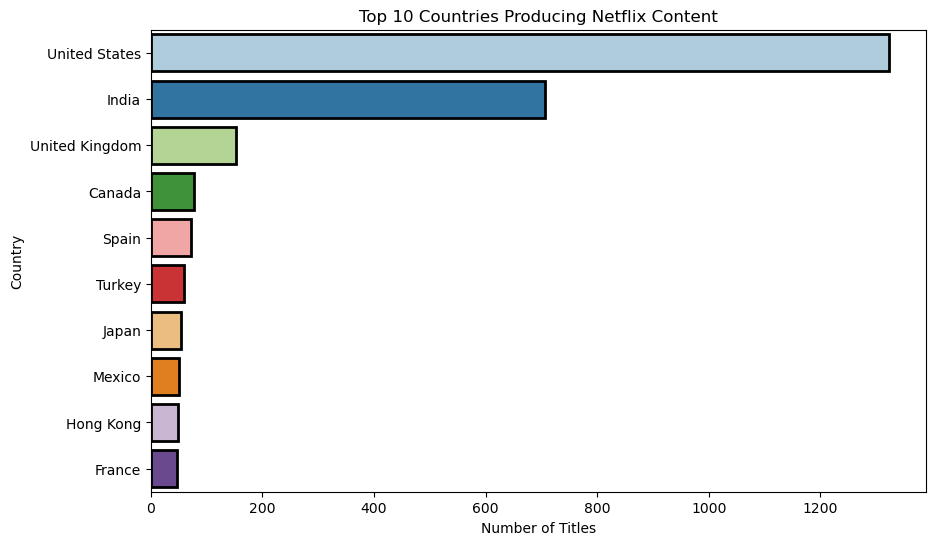

In [130]:
country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index,palette='Paired',linewidth=2,edgecolor='black')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


## `How are the ratings distributed for Movies and TV Shows?`

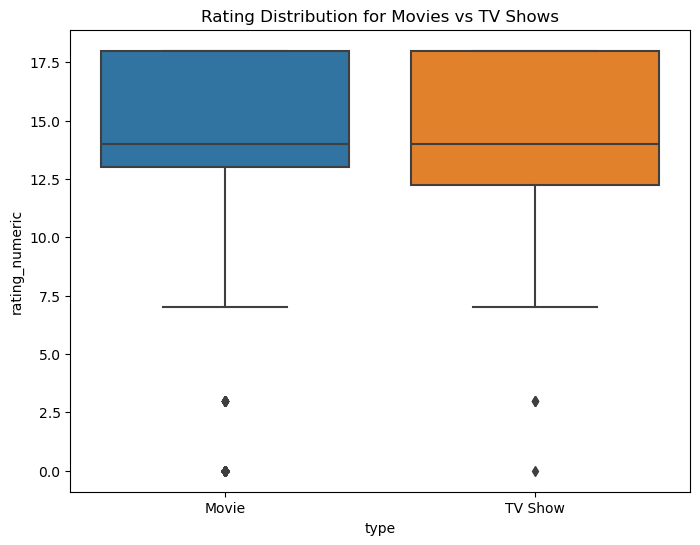

In [132]:
rating_map = {
    'TV-MA': 18, 'TV-14': 14, 'TV-PG': 7, 'PG': 7, 'PG-13': 13,
    'R': 17, 'NR': 0, 'TV-G': 0, 'TV-Y7': 7, 'TV-Y': 3, 'G': 0,
    'Unrated': 0, 'UR': 0, 'NC-17': 17, 'TV-Y7-FV': 7
}
df.loc[:,'rating_numeric'] = df['rating'].map(rating_map)
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='rating_numeric', data=df)
plt.title('Rating Distribution for Movies vs TV Shows')
plt.show()


## `Which director has the most titles on Netflix?`

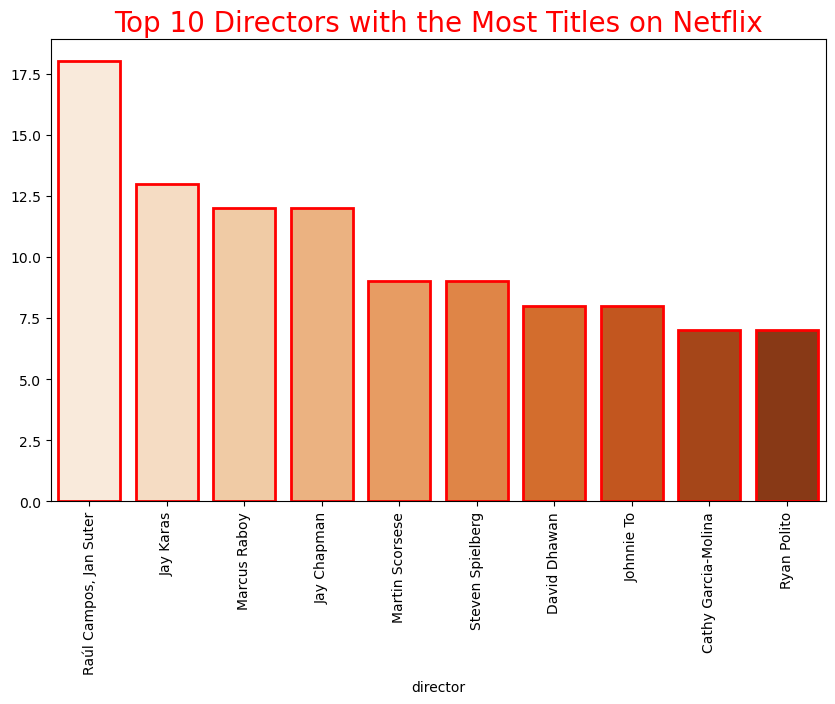

In [134]:
director = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=director.index, y=director.values,palette='Oranges',linewidth=2,edgecolor='red')
plt.title('Top 10 Directors with the Most Titles on Netflix',fontsize=20,color='red')
plt.xticks(rotation=90)
plt.show()

## `Visualize the Distribution of Content Ratings`

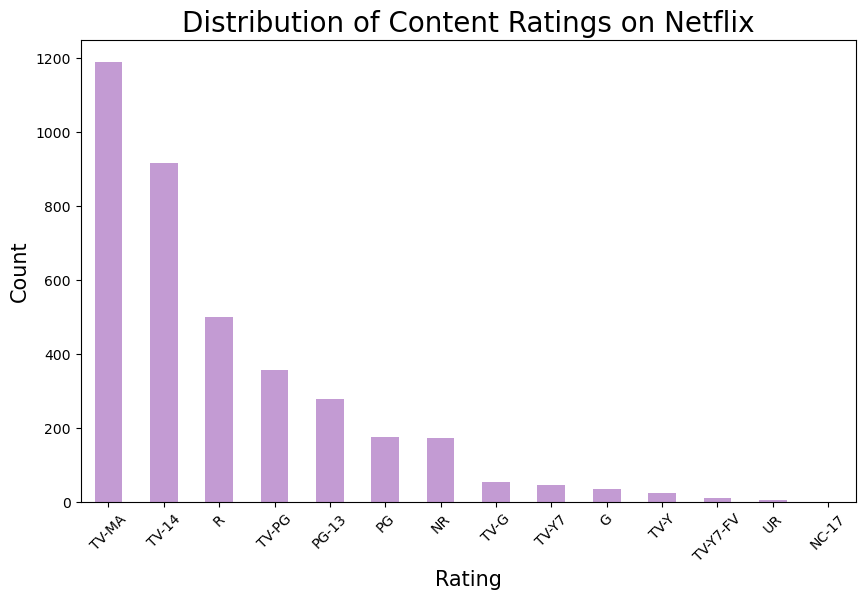

In [136]:
rating= df['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating.plot(kind='bar', color='#c39bd3')
plt.title('Distribution of Content Ratings on Netflix',fontsize=20)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()


## `Visualize the Proportion of TV Shows vs Movies`

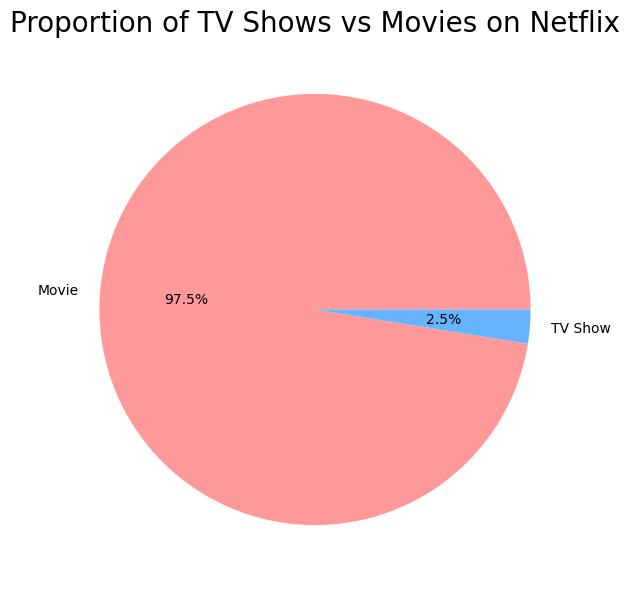

In [140]:
type= df['type'].value_counts()
plt.figure(figsize=(7, 7))
type.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Proportion of TV Shows vs Movies on Netflix',fontsize=20)
plt.ylabel('')
plt.show()


## `Visualize the Distribution of Content by Country`

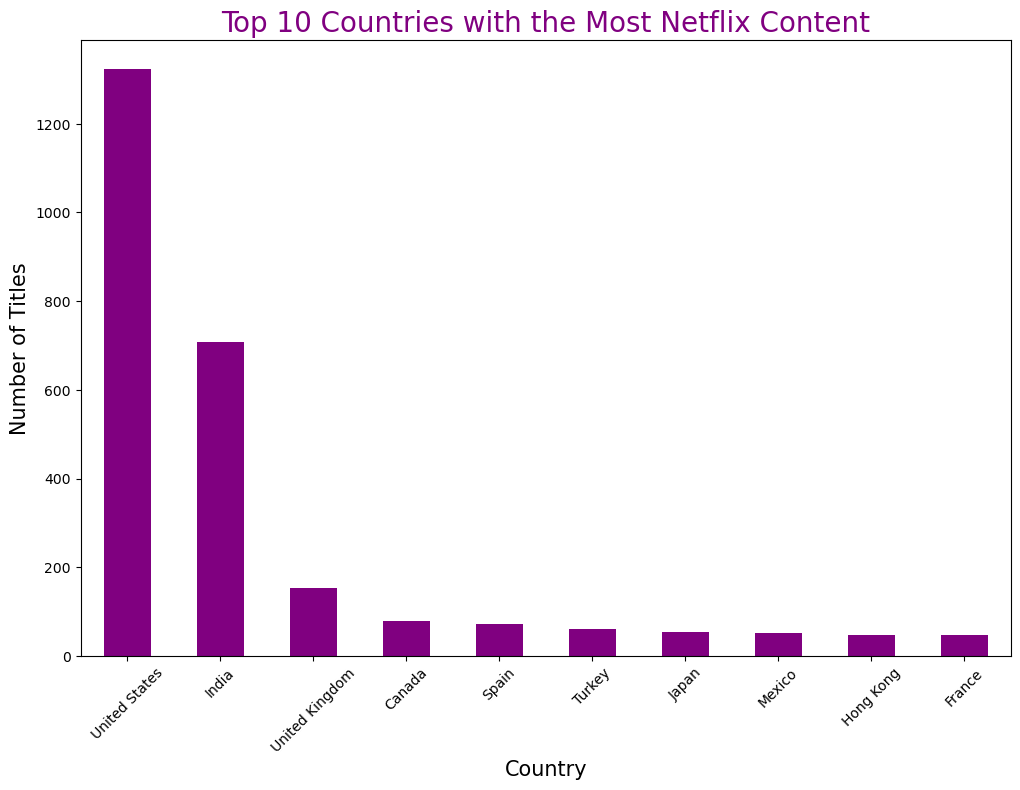

In [142]:
country= df['country'].value_counts()
plt.figure(figsize=(12, 8))
country.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Countries with the Most Netflix Content',fontsize=20, color='purple')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Titles',fontsize=15)
plt.xticks(rotation=45)
plt.show()


## `Content Added by Month (Seasonality)`

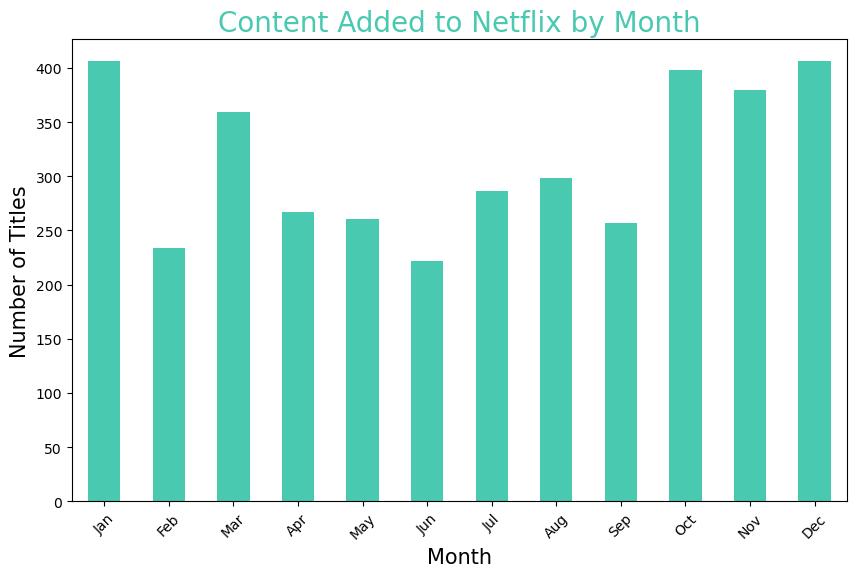

In [144]:
df.loc[:,'month_added'] = pd.to_datetime(df['date_added']).dt.month
month_counts = df['month_added'].value_counts().sort_index()
month_counts.plot(kind='bar', figsize=(10, 6), color='#48c9b0')
plt.title("Content Added to Netflix by Month",fontsize=20,color='#48c9b0')
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of Titles",fontsize=15)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


## `Histogram of Release Years`

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


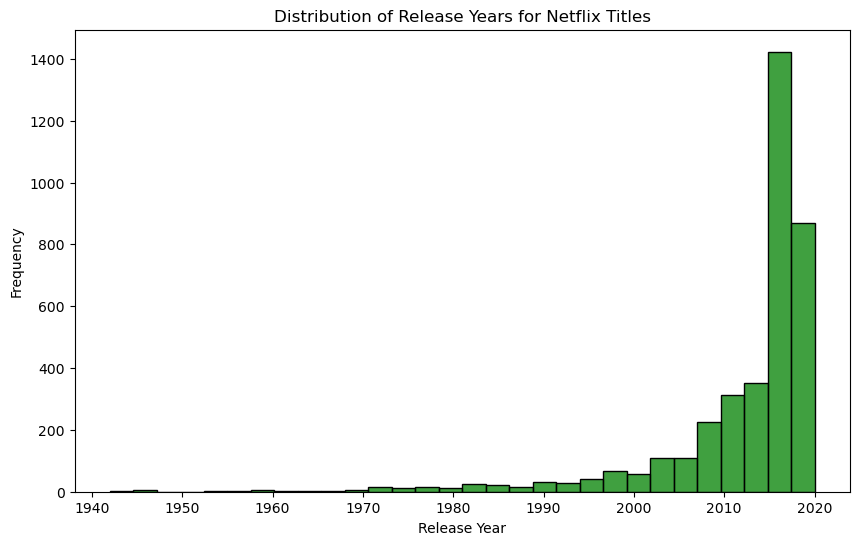

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(df.loc[:,'release_year'], kde=False, color='green', bins=30)
plt.title("Distribution of Release Years for Netflix Titles")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()


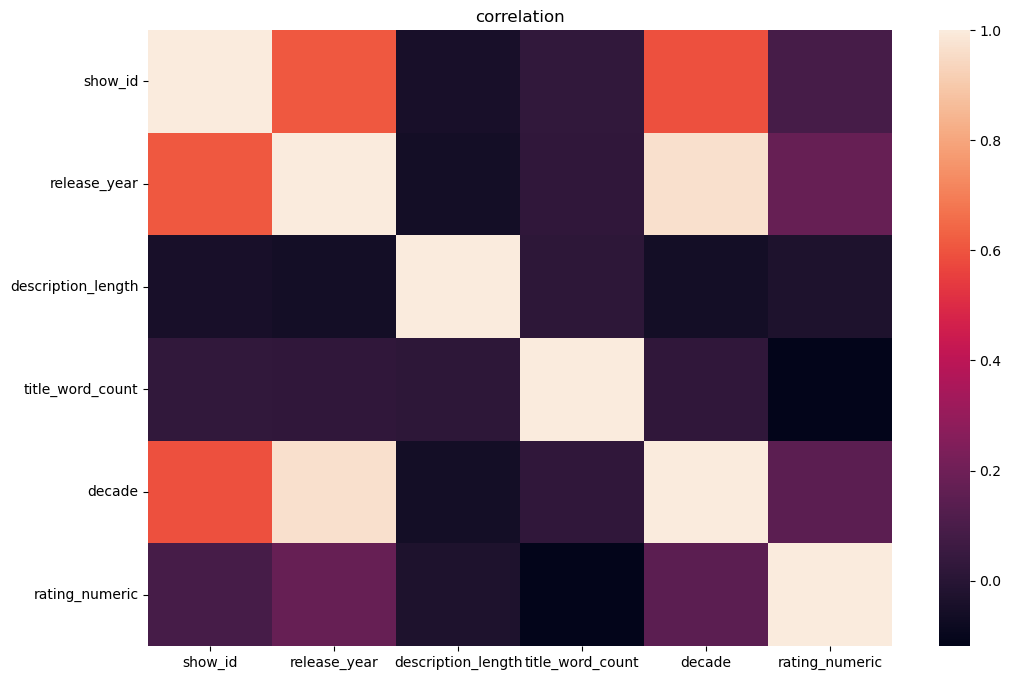

In [148]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix)
plt.title("correlation")
plt.show()

## **Conclusion Of `Netflix` data Analysis**

* ## Content Distribution by Type:
The dataset is a mix of Movies and TV Shows, with Movies being the most dominant category.

* ## Content Added Over Time:
The analysis shows that the addition of new content on Netflix has grown substantially over the years, especially post-2010, with a significant spike in new additions around the 2010s.

* ## Content by Genre:
Some of the most popular genres in the Netflix catalog include Dramas, Comedies, Documentaries, and International Movies. These genres are the most common in both Movies and TV Shows

* ## Geographical Distribution:
The United States is the largest producer of Netflix content, followed by countries like India, United Kingdom, Japan, and Canada.

* ## Correlation Between Content Attributes:
The ratings of movies and TV shows also have different trends; most of them are rated either TV-MA or TV-14, showing that Netflix offers a wide variety of adult content.

* ## Content Produced in Multiple Countries:
A significant trend is the rise in co-productions with more than one country, which is in line with Netflix's strategy of producing content that will resonate with global audiences. This is in line with Netflix's vision of becoming a global platform with local content in different regions.

* ## Family-Friendly Titles:
The dataset shows that family-friendly content (such as TV-Y, TV-Y7 ratings) makes up a smaller percentage of Netflix's overall catalog, but these titles are crucial for attracting younger audiences and families.

* ## Data Quality Concerns:
The dataset had several missing values as well as integrity issues, in that there may be missing data on the directors or cast; these could possibly impact deeper analysis or more specific insights.